In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
from glob import glob  
import pandas as pd
import openslide as ops
import h5py
import anndata as ad
from shapely import wkb
from shapely.geometry import shape
import matplotlib.pyplot as plt


Barcodes shape: (2901, 1) dtype: object
Coords shape: (2901, 2) dtype: int32
Images shape: (2901, 224, 224, 3) dtype: uint8

First 5 barcodes: [[b'013x000']
 [b'013x001']
 [b'013x002']
 [b'013x003']
 [b'013x004']]
First 5 coords: [[4680 -146]
 [4955 -146]
 [5230 -146]
 [5505 -146]
 [5780 -146]]


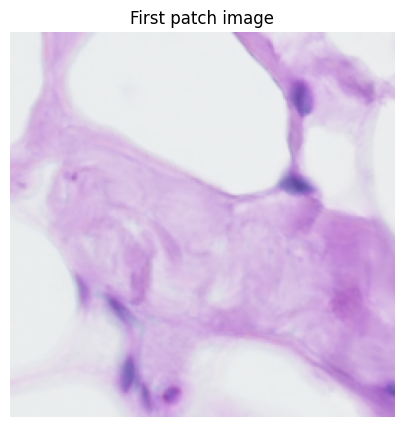

In [10]:
h5_path = "../../data/Brest_spatialTranscriptome/patches/NCBI784.h5"
with h5py.File(h5_path, "r") as f:
    # 각 데이터셋에 접근
    barcodes = f["barcode"][:]  # numpy array로 변환
    coords = f["coords"][:]
    images = f["img"][:]
    
    # 데이터 정보 확인
    print("Barcodes shape:", barcodes.shape, "dtype:", barcodes.dtype)
    print("Coords shape:", coords.shape, "dtype:", coords.dtype)
    print("Images shape:", images.shape, "dtype:", images.dtype)
    
    # 첫 몇 개 데이터 확인
    print("\nFirst 5 barcodes:", barcodes[:5])
    print("First 5 coords:", coords[:5])
    
    # 이미지가 있다면 첫 번째 이미지 시각화
    if len(images.shape) >= 3:
        plt.figure(figsize=(5, 5))
        plt.imshow(images[169])
        plt.title("First patch image")
        plt.axis('off')
        plt.show()


In [17]:
len(np.where((coords[:,0]>6000) & (coords[:,0]<8000) & (coords[:,1]>4000) & (coords[:,1]<6000))[0])

56

In [ ]:
h5ad_path = "../../data/Brest_spatialTranscriptome/st/NCBI783.h5ad"  # 실제 경로로 변경
adata = ad.read_h5ad(h5ad_path)
print(adata)            # 요약 정보
print(adata.obs.head()) # 셀 메타데이터(관찰치)
print(adata.var.head()) # 유전자 메타데이터(변수)
X = adata.X   

In [ ]:
# Parquet 파일 읽기
import pandas as pd

# 예시: xenium cell segmentation parquet 파일
xenium_seg_path = "../../data/Brest_spatialTranscriptome/xenium_seg/NCBI783_xenium_nucleus_seg.parquet"
df_seg = pd.read_parquet(xenium_seg_path)

print("=== Cell Segmentation Data ===")
print(f"Shape: {df_seg.shape}")
print(f"\nColumns: {df_seg.columns.tolist()}")
print(f"\nData types:\n{df_seg.dtypes}")
print(f"\nFirst 5 rows:\n{df_seg.head()}")

# 예시: transcripts parquet 파일
transcript_path = "../../data/Brest_spatialTranscriptome/transcripts/NCBI783_transcripts.parquet"
df_transcript = pd.read_parquet(transcript_path)

print("\n\n=== Transcripts Data ===")
print(f"Shape: {df_transcript.shape}")
print(f"\nColumns: {df_transcript.columns.tolist()}")
print(f"\nData types:\n{df_transcript.dtypes}")
print(f"\nFirst 5 rows:\n{df_transcript.head()}")

# 기본 통계
print(f"\n\nUnique cells: {df_transcript['cell_id'].nunique()}")
print(f"Unique genes: {df_transcript['feature_name'].nunique()}")
print(f"Total transcripts: {len(df_transcript)}")


In [ ]:
df_seg

In [ ]:
df_transcript['feature_name'].unique()

In [ ]:
df_seg['geometry']

In [ ]:


# WKB 형식 geometry 읽기
geom_binary = df_seg['geometry'].iloc[0]
print("Binary format:", type(geom_binary))

# WKB를 Shapely geometry 객체로 변환
polygon = wkb.loads(geom_binary)
print("Geometry type:", polygon.geom_type)
print("Polygon area:", polygon.area)
print("Polygon centroid:", polygon.centroid)

# 좌표 추출
x, y = polygon.exterior.xy
print(f"Number of points: {len(x)}")
print(f"First 5 coordinates: {list(zip(x, y))}")


In [ ]:
df_transcript[df_transcript['cell_id']==b'aagigajm-1']